In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


# Importing all necessary Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import datetime
import warnings
import keras
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Activation
from keras.layers import Dropout
import tensorflow as tf
warnings.simplefilter('ignore')

Using TensorFlow backend.


In [0]:
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/Weather_data.csv")

In [4]:
data.head()

,datetime_utc,_conds,_dewptm,_fog,_hail,_heatindexm,_hum,_precipm,_pressurem,_rain,_snow,_tempm,_thunder,_tornado,_vism,_wdird,_wdire,_wgustm,_windchillm,_wspdm
0,19961101-11:00,Smoke,9.0,0,0,NaN,27.0,NaN,1010.0,0,0,30.0,0,0,5.0,280.0,West,NaN,NaN,7.4
1,19961101-12:00,Smoke,10.0,0,0,NaN,32.0,NaN,-9999.0,0,0,28.0,0,0,NaN,0.0,North,NaN,NaN,NaN
2,19961101-13:00,Smoke,11.0,0,0,NaN,44.0,NaN,-9999.0,0,0,24.0,0,0,NaN,0.0,North,NaN,NaN,NaN
3,19961101-14:00,Smoke,10.0,0,0,NaN,41.0,NaN,1010.0,0,0,24.0,0,0,2.0,0.0,North,NaN,NaN,NaN
4,19961101-16:00,Smoke,11.0,0,0,NaN,47.0,NaN,1011.0,0,0,23.0,0,0,1.2,0.0,North,NaN,NaN,0.0


# Data Preprocessing

In [41]:
data['time']=pd.to_datetime(data['datetime_utc'])
data.drop("datetime_utc",inplace=True,axis=1)

In [42]:
data.set_index('time',inplace=True)

# Drop all the unnecessary columns

In [43]:
data.drop([" _wgustm"," _precipm"],axis=1,inplace=True)
data.drop([' _windchillm'],axis=1,inplace=True)
data.drop([" _heatindexm"],axis=1,inplace=True)
data=data[data[" _conds"]!="Unknown"]

In [44]:
data.isnull().sum()

 _conds           68
 _dewptm         517
 _fog              0
 _hail             0
 _hum            645
 _pressurem      231
 _rain             0
 _snow             0
 _tempm          567
 _thunder          0
 _tornado          0
 _vism          4320
 _wdird        14380
 _wdire        14380
 _wspdm         2313
dtype: int64

In [45]:
data.fillna(0,inplace=True) #filling 0 in place of nan values 

In [46]:
data.isnull().sum()

 _conds        0
 _dewptm       0
 _fog          0
 _hail         0
 _hum          0
 _pressurem    0
 _rain         0
 _snow         0
 _tempm        0
 _thunder      0
 _tornado      0
 _vism         0
 _wdird        0
 _wdire        0
 _wspdm        0
dtype: int64

# Feature Engineering

# One hot encoding

In [56]:
condition=pd.get_dummies(data[' _conds'])  
wind_dir=pd.get_dummies(data[' _wdire'])

In [57]:
condition.drop('Widespread Dust',axis=1,inplace=True)
wind_dir.drop('West',axis=1,inplace=True)

In [62]:
data=pd.concat([data,condition],axis='columns')

In [63]:
data=pd.concat([data,wind_dir],axis='columns')

In [65]:
data.head()

,_conds,_dewptm,_fog,_hail,_hum,_pressurem,_rain,_snow,_tempm,_thunder,...,NW,North,SE,SSE,SSW,SW,South,Variable,WNW,WSW
time,,,,,,,,,,,,,,,,,,,,,
1996-11-01 11:00:00,Smoke,9.0,0,0,27.0,1010.0,0,0,30.0,0,...,0,0,0,0,0,0,0,0,0,0
1996-11-01 12:00:00,Smoke,10.0,0,0,32.0,-9999.0,0,0,28.0,0,...,0,1,0,0,0,0,0,0,0,0
1996-11-01 13:00:00,Smoke,11.0,0,0,44.0,-9999.0,0,0,24.0,0,...,0,1,0,0,0,0,0,0,0,0
1996-11-01 14:00:00,Smoke,10.0,0,0,41.0,1010.0,0,0,24.0,0,...,0,1,0,0,0,0,0,0,0,0
1996-11-01 16:00:00,Smoke,11.0,0,0,47.0,1011.0,0,0,23.0,0,...,0,1,0,0,0,0,0,0,0,0


In [66]:
data.shape

(98535, 70)

In [0]:
data.drop([' _conds',' _wdire'],axis=1,inplace=True)#dropping these 2 columns 

In [0]:
X=data.drop([' _tempm'],axis=1)

In [0]:
y=data[' _tempm'].values

 # Standard Scaling

In [0]:
st=StandardScaler()

In [0]:
final_x=st.fit_transform(X)
final_y=st.fit_transform(y.reshape(-1,1))

# Reshaping the data

In [0]:
X=np.reshape(final_x,(final_x.shape[0],final_x.shape[1],1))

# Splitting the dataset into train and test data

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X,final_y,random_state=45,test_size=0.2)

In [23]:
y_test.shape

(19707, 1)

# Creating model 

In [24]:
#intializing the model
model = Sequential() 

#adding a lstm layer and some dropout regularisation units means number of neuron
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

#adding a second layer of lstm with some dropout regularisation
model.add(LSTM(50,return_sequences=True))
model.add(Dropout(0.2))
#adding a third  layer of lstm 
model.add(LSTM(20))
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
checkpoint_path="/content/drive/My Drive/Colab Notebooks/Temp_analysis/model2_checkpoint.ckpt"
checkpoint_callback= keras.callbacks.ModelCheckpoint(checkpoint_path,
                            monitor='val_acc',
                            verbose=1,
                            save_best_only=True,
                            )
early_checkpoints=keras.callbacks.EarlyStopping(monitor='val_loss', 
                                                          patience=4, 
                                                          verbose=1,
                                                          mode='auto',
                                                          restore_best_weights=False)

# Model fitting

In [26]:
history = model.fit(X_train, y_train, epochs=50, batch_size=32,verbose=2, shuffle=False,validation_data=(X_test,y_test),callbacks=[checkpoint_callback,early_checkpoints])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 78828 samples, validate on 19707 samples
Epoch 1/50





 - 88s - loss: 0.1738 - val_loss: 0.0957
Epoch 2/50
 - 87s - loss: 0.0768 - val_loss: 0.0589
Epoch 3/50
 - 87s - loss: 0.0600 - val_loss: 0.0496
Epoch 4/50
 - 87s - loss: 0.0558 - val_loss: 0.0464
Epoch 5/50
 - 87s - loss: 0.0538 - val_loss: 0.0465
Epoch 6/50
 - 87s - loss: 0.0478 - val_loss: 0.0449
Epoch 7/50
 - 88s - loss: 0.0542 - val_loss: 0.0443
Epoch 8/50
 - 87s - loss: 0.0487 - val_loss: 0.0437
Epoch 9/50
 - 87s - loss: 0.0453 - val_loss: 0.0435
Epoch 10/50
 - 87s - loss: 0.0428 - val_loss: 0.0412
Epoch 11/50
 - 87s - loss: 0.0491 - val_loss: 0.0430
Epoch 12/50
 - 88s - loss: 0.0416 - val_loss: 0.0410
Epoch 13/50
 - 87s - loss: 0.0419 - val_loss: 0.0390
Epoch 14/50
 - 88s - loss: 0.0431 - val_loss: 0.0395
Epoch 15/50
 - 87s - loss: 0.0390 - val_loss: 0.0404
Epoch 16/50
 - 87s - loss: 0.0419 - val_loss: 0.0365
Epoch 17/

In [ ]:
#

In [0]:
 model.save("/content/drive/My Drive/Colab Notebooks/Temp_analysis/temp_analysis_new5.h5")

# Visualization of losses

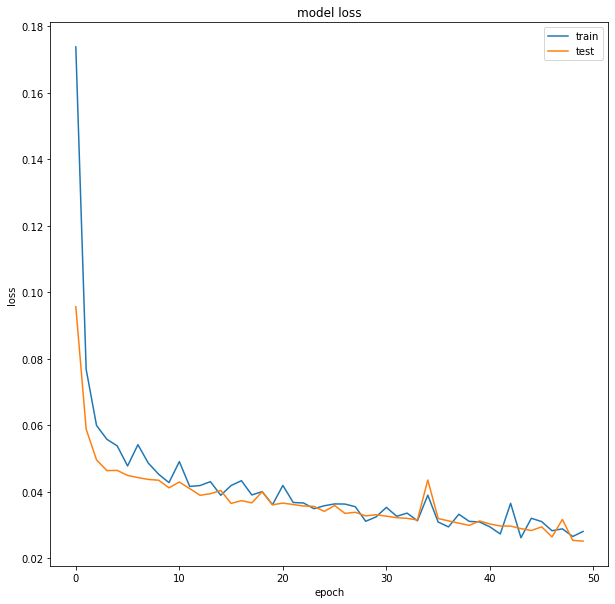

In [35]:
plt.figure(figsize=(10,10))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [0]:
checking_model=keras.models.load_model("/content/drive/My Drive/Colab Notebooks/Temp_analysis/temp_analysis_new3.h5")





Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




# Predicted values

In [0]:
chec=model.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(chec,y_test)

# Mean Square Error

In [30]:
mse

0.025204738084844556

# Converting normalize values into original form

In [36]:
st.inverse_transform(chec)
st.inverse_transform(y_test)

array([[32.59328 ],
       [35.931828],
       [36.69421 ],
       ...,
       [15.789156],
       [34.87705 ],
       [28.554354]], dtype=float32)

# Method for preprocessing the data  before testing

In [73]:
def datapreprocessing(data):
    data['time']=pd.to_datetime(data['datetime_utc']) #converting the date column into date time format
    data.drop("datetime_utc",inplace=True,axis=1) #drop the old date-time-column
    data.set_index('time',inplace=True) #setting date-time-column as index of the dataset
    data.drop([" _wgustm"," _precipm"],axis=1,inplace=True) #dropping all unnecessary columns
    data.drop([' _windchillm'],axis=1,inplace=True)
    data.drop([" _heatindexm"],axis=1,inplace=True)
    data=data[data[" _conds"]!="Unknown"]
    std=StandardScaler()
    data.fillna(0,inplace=True)
    condition=pd.get_dummies(data[' _conds']) #doing one hot encoding here
    wind_dir=pd.get_dummies(data[' _wdire'])
    condition.drop('Widespread Dust',axis=1,inplace=True)
    wind_dir.drop('West',axis=1,inplace=True)
    data=pd.concat([data,condition],axis='columns')
    data=pd.concat([data,wind_dir],axis='columns')
    data.drop(' _conds',inplace=True,axis=1)
    data.drop(' _wdire',inplace=True,axis=1)
    final_x=std.fit_transform(data)#standar scaling of the data
    X=np.reshape(final_x,(final_x.shape[0],final_x.shape[1],1))
    return X

